## Import Modules and Import Data

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import os
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
print("Train data dimensions: ", df_train.shape)
print("Test data dimensions: ", df_test.shape)

Train data dimensions:  (891, 12)
Test data dimensions:  (418, 11)


## Prepare Data

In [3]:
# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [4]:
# Return the first few rows of the dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [6]:
# Return the number of missing values in each column
data.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

There are 263 missing values for Age, 1 missing value for Fare, 1014 missing value for Cabin, and 2 missing values for Embarked. I will replace missing values of Age, Fare and Embarked with median values. Besides, Cabin and Ticket variables are unnecessary and I will drop these columns.

In [7]:
# Drop Cabin
data.drop(columns=['Cabin','Ticket'], inplace=True)

In [8]:
# Replace missing values of Age and Fare with median values
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

fare_median = data['Fare'].median()
data['Fare'].fillna(fare_median, inplace=True)

In [9]:
# Replace missing values of Embarked with Mode
data['Embarked'].fillna(data.Embarked.mode()[0], inplace=True)

data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [10]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
# Create title column
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace uncommon titles with more common ones
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Combine similar titles
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [12]:
# Convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Embarked_Coded'] = enc.fit_transform(data['Embarked'])
data['Sex_Coded'] = enc.fit_transform(data['Sex'])
data['Title'] = enc.fit_transform(data['Title']) 
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Coded,Sex_Coded
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,2,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,2,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,2,1


In [13]:
# Create a new variable for total sum of SibSp and Parch
data['Family'] = data['SibSp'] + data['Parch']

In [14]:
# Split data back into test and train datasets
data_train = data.iloc[:891]
data_test = data.iloc[891:]
data_train['Survived'] = survived_train

In [15]:
# Split the data into train and validations sets by using train_test_split
X = data_train
y = df_train.Survived
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

## Explore Data

### Survived

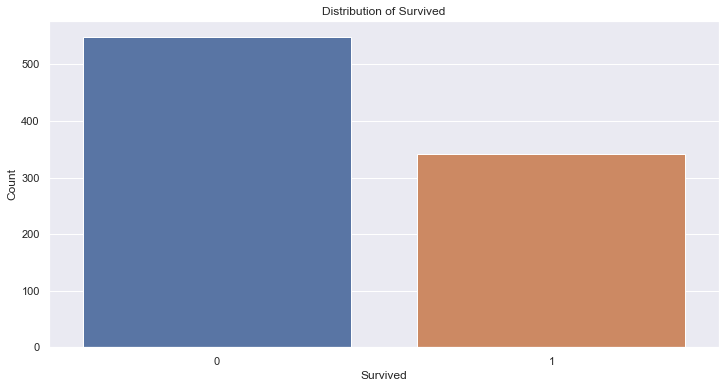

In [16]:
# Explore Survived
plt.figure(figsize=[12, 6])
ax = sns.countplot(data=data_train, x='Survived')
ax.set(xlabel='Survived', ylabel='Count', title='Distribution of Survived');

### Sex

In [17]:
# Explore Sex
data_train.groupby('Survived')['Sex'].value_counts().unstack('Sex')

Sex,female,male
Survived,,
0,81,468
1,233,109


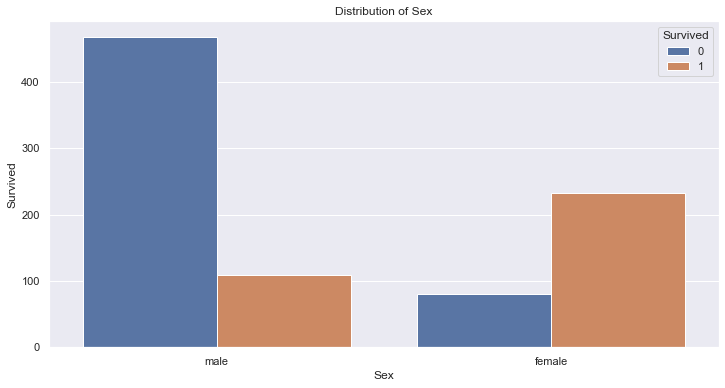

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data=data_train, x='Sex', hue='Survived', ax=ax)
ax.set(xlabel='Sex', ylabel='Survived', title='Distribution of Sex');

We can see that there are more male passengers than female passengers. Women (74.2%) are more likely to survive than men (18.9%). We will use this variable to build models.

### Ticket Class

In [19]:
# Explore Ticket Class
data_train.groupby('Survived')['Pclass'].value_counts().unstack('Pclass')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


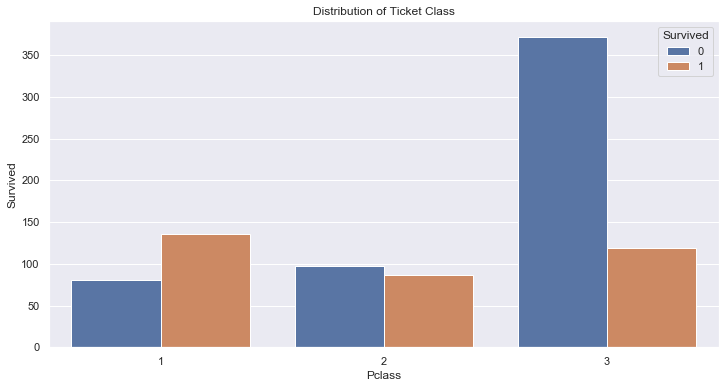

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data=data_train, x='Pclass', hue='Survived', ax=ax)
ax.set(xlabel='Pclass', ylabel='Survived', title='Distribution of Ticket Class');

We can see that most passengers were in 3rd class. 1st class (63.0%) and 2nd class (47.3%) have the highest chance of survival and 3rd class (24.2%) has the lowest chance of survival. There seems to be a correlation between ticket class and survival chance so we will use this variable.

### Family

In [21]:
# Explore Family
data_train.groupby('Survived')['Family'].value_counts().unstack('Family')

Family,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
1,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


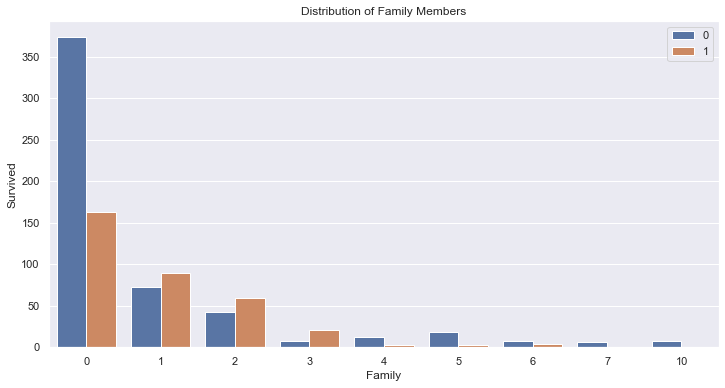

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data=data_train, x='Family', hue='Survived', ax=ax)
ax.set(xlabel='Family', ylabel='Survived', title='Distribution of Family Members')
plt.legend(loc='upper right');

We can see that most passengers went by themselves and they have a low chance of survival. Passengers with 1-3 other family members have the highest chance of survival. As the number of family members increases, the chance of survival decreases. It's likely that there is a correlation between family and survival so we will use this variable.

### Port of Embarkation

In [23]:
# Explore Port of Embarkation
data_train.groupby('Survived')['Embarked'].value_counts().unstack('Embarked')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


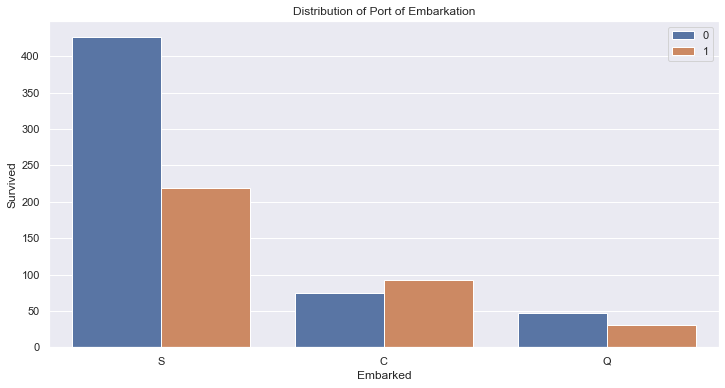

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data=data_train, x='Embarked', hue='Survived', ax=ax)
ax.set(xlabel='Embarked', ylabel='Survived', title='Distribution of Port of Embarkation')
plt.legend(loc='upper right');

The majority of people embarked from Southampton. There is a low chance of survival for those boarded from Southampton (33.9%) and Queenstown (39.0%) while there is a higher chance of survival for those who boarded from Cherbourg (55.4%).

### Age

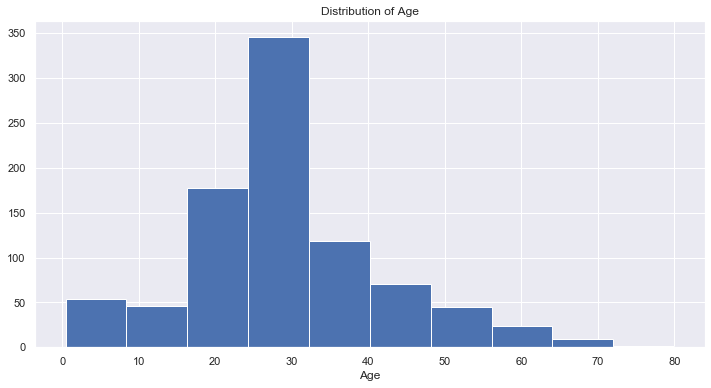

In [25]:
# Explore Age
plt.figure(figsize=[12, 6])
plt.hist(data_train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age');


The distribution is slightly skewed to the right with only a few passengers older than 50 years old.

In [26]:
# Divide age into categories for easier analysis

age_category = []

for age in data_train['Age']:
    if age <= 20:
        age_category.append('0-20')
    elif age <= 40:
        age_category.append('21-40')
    elif age <= 60:
        age_category.append('41-60')
    else:
        age_category.append('>=61')

data_train['Age Category'] = age_category

data_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Coded,Sex_Coded,Family,Survived,Age Category
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,2,1,1,0,21-40
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0,0,1,1,21-40
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2,0,0,1,21-40
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,2,0,1,1,21-40
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,2,1,0,0,21-40


In [27]:
data_train.groupby('Survived')['Age Category'].value_counts().unstack('Age Category')

Age Category,0-20,21-40,41-60,>=61
Survived,,,,
0,97,357,78,17
1,82,205,50,5


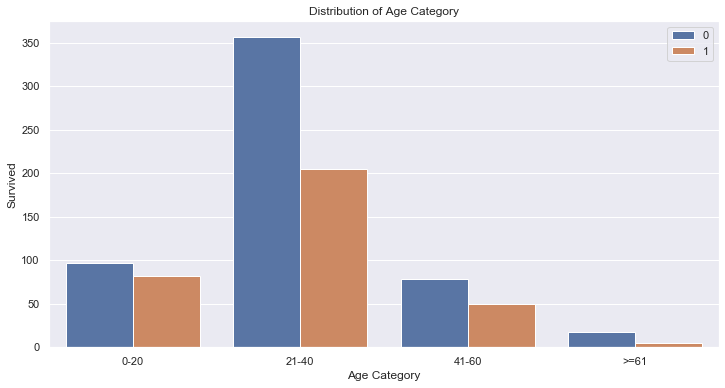

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
order = ['0-20', '21-40', '41-60', '>=61']
ax = sns.countplot(data=data_train, x='Age Category', hue='Survived', ax=ax, order = order)
ax.set(xlabel='Age Category', ylabel='Survived', title='Distribution of Age Category')
plt.legend(loc='upper right');

Most passengers were in the age of 21-40. The group of >=61 has the lowest chance of survival 22.7%. The group of 0-20 has the highest chance of survival 45.8%. Group 21-40 has the survival rate of 36.5% and group 41-60 has the survival rate of 39.1%

### Fare

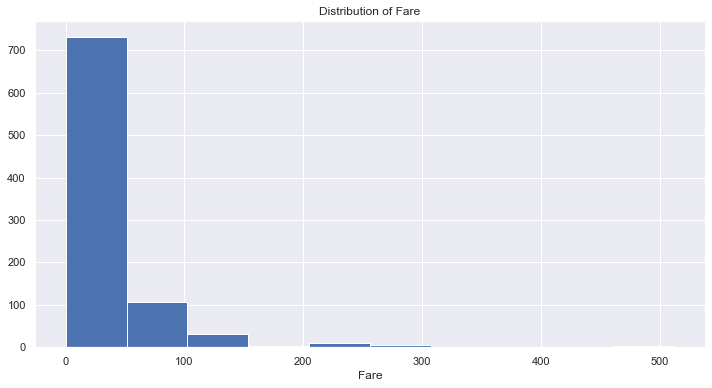

In [29]:
# Explore Fare
plt.figure(figsize=[12, 6])
plt.hist(data_train['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare');

The majority of fare is lower than 150. The distribution is skewed to right with a few higher than 200.

In [30]:
# Divide fare into categories for easier analysis

fare_category = []

for fare in data_train['Fare']:
    if fare <= 50:
        fare_category.append('Low')
    elif fare <= 150:
        fare_category.append('Medium')
    else:
        fare_category.append('High')

data_train['Fare Category'] = fare_category

data_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Coded,Sex_Coded,Family,Survived,Age Category,Fare Category
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,2,1,1,0,21-40,Low
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0,0,1,1,21-40,Medium
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2,0,0,1,21-40,Low
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,2,0,1,1,21-40,Medium
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,2,1,0,0,21-40,Low


In [31]:
data_train.groupby('Survived')['Fare Category'].value_counts().unstack('Fare Category')

Fare Category,High,Low,Medium
Survived,,,
0,9,498,42
1,20,233,89


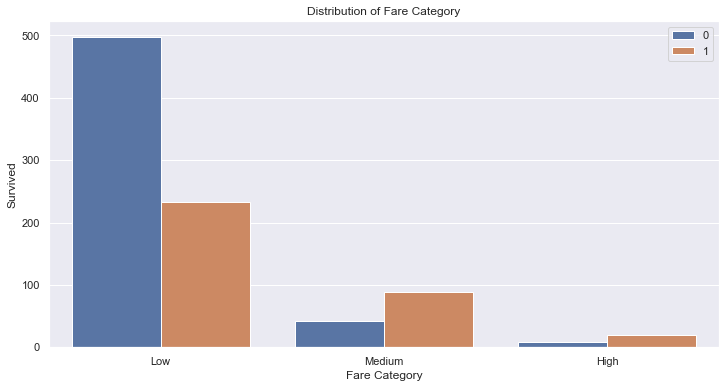

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
order = ['Low','Medium','High']
ax = sns.countplot(data=data_train, x='Fare Category', hue='Survived', ax=ax, order = order)
ax.set(xlabel='Fare Category', ylabel='Survived', title='Distribution of Fare Category')
plt.legend(loc='upper right');

The majority of passengers had low-priced fares. Those with high-priced fares have the highest chance of survival (69.0%) while those with low-priced fares have the lowest chance of survival (31.9%).

### Correlation Matrix

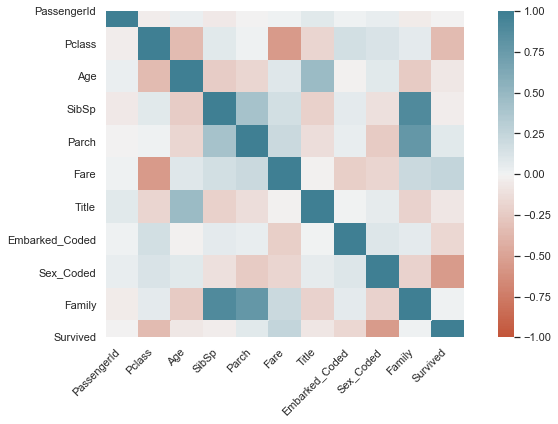

In [33]:
corr = data_train.corr()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There is a strong correlation between Fare and Pclass. I will use Pclass since it has higher correlation with Survived.

### Scatter Matrix

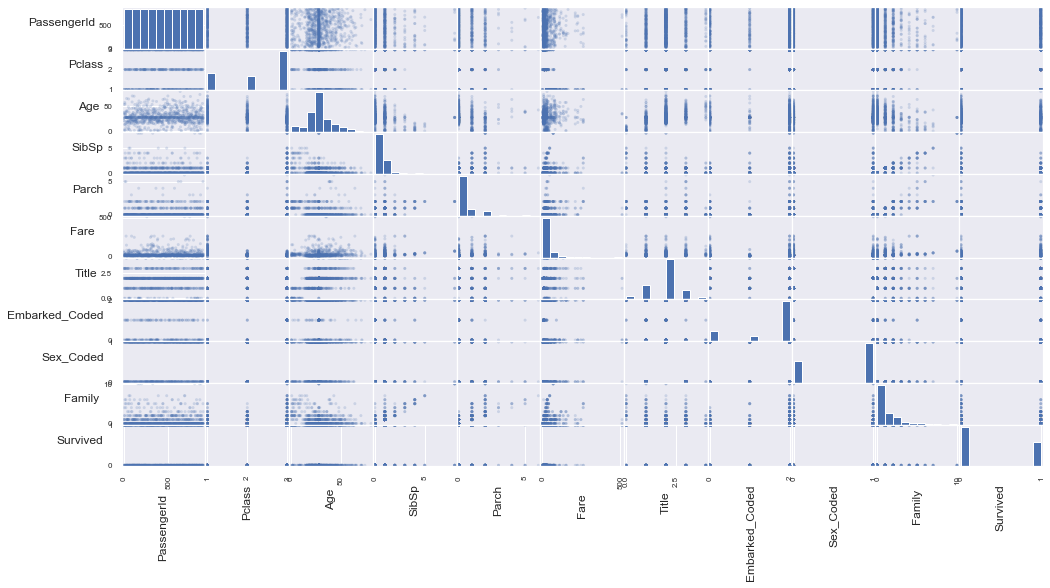

In [34]:
# Python scatter matrix with Pandas
axes = pd.plotting.scatter_matrix(data_train, alpha=0.2, figsize=[14.70, 8.27], diagonal = 'hist')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Sex, Age, and Survived

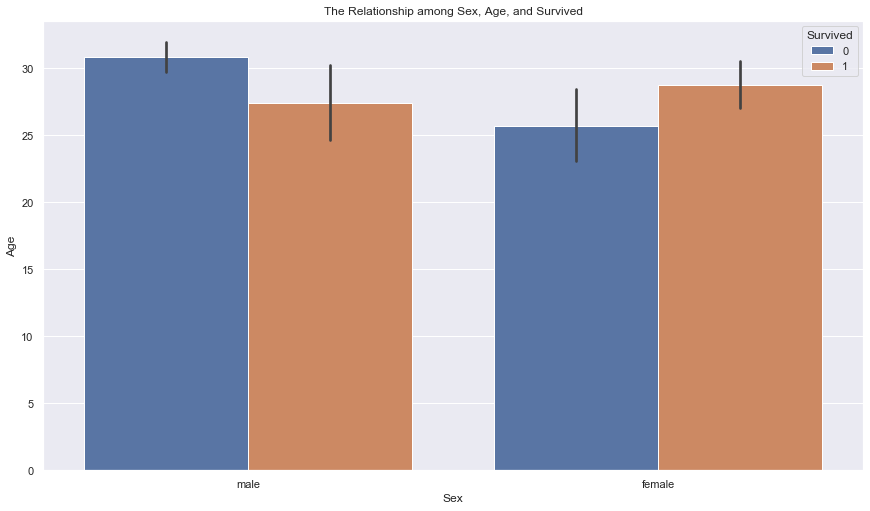

In [35]:
plt.figure(figsize=[14.70, 8.27])
sns.barplot(data=data_train, x='Sex', y='Age', hue='Survived')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.title('The Relationship among Sex, Age, and Survived');

In [36]:
data_train.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0           25.666667
        1           28.716738
male    0           30.783120
        1           27.382294
Name: Age, dtype: float64

We can see that men who survived were 30.78 years old on average and those who died were 27.38 years old on average. Women who survived were 28.72 years old on average and those who died were 25.67 years old on average

## Build Model

In [37]:
# Split the data into train and validations sets by using train_test_split
X = data_train[['Pclass','Age','Embarked_Coded','Sex_Coded','Family','Fare']]
y = df_train.Survived
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

### Logistic Regression

Optimal number of features: 5
Selected features: ['Pclass', 'Age', 'Embarked_Coded', 'Sex_Coded', 'Family']


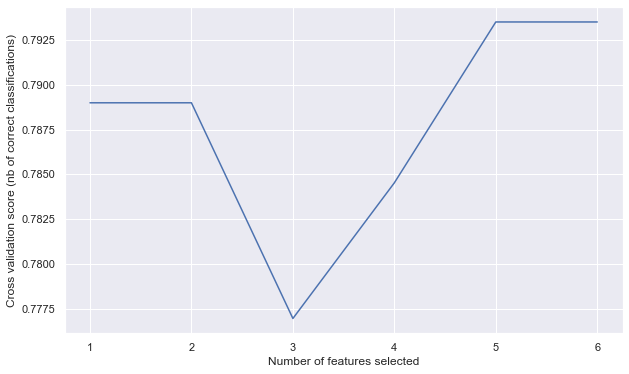

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import cross_validate

# Create the RFE object and compute a cross-validated score.
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [39]:
X = data_train[['Pclass', 'Age', 'Embarked_Coded', 'Sex_Coded', 'Family']]
y = df_train.Survived
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

In [40]:
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0)

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = logreg.predict(X_valid)

# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % logreg.score(X_valid, y_valid))

# Use score method to get accuracy of model
print('Recall: %.4f'
      % recall_score(y_valid, y_pred))

# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % precision_score(y_valid, y_pred))

Accuracy: 0.7982
Recall: 0.7262
Accuracy: 0.7349


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.864


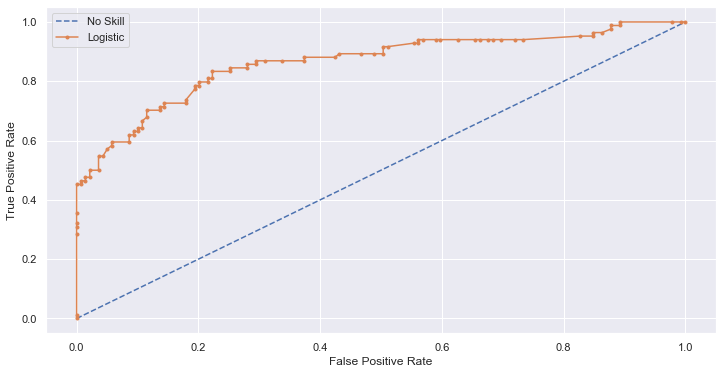

In [41]:
# predict probabilities
lr_probs = logreg.predict_proba(X_valid)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
plt.figure(figsize=[12, 6])
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Naive Bayes

In [42]:
# Split the data into train and validation sets by using train_test_split with selected features
X = data_train[['Pclass', 'Age', 'Embarked_Coded', 'Sex_Coded', 'Family']]
y = df_train.Survived
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [44]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.0001232846739442066}

In [45]:
#Create a Gaussian Classifier
Gaussian = GaussianNB(var_smoothing = 0.0001232846739442066, priors=None)

# Train the model using the training sets
Gaussian.fit(X_train,y_train)

#Predict Output
predicted= Gaussian.predict(X_valid)

# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % Gaussian.score(X_valid, y_valid))

# Use score method to get accuracy of model
print('Recall: %.4f'
      % recall_score(y_valid, y_pred))

# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % precision_score(y_valid, y_pred))

Accuracy: 0.8072
Recall: 0.7262
Accuracy: 0.7349


No Skill: ROC AUC=0.500
Gaussian: ROC AUC=0.864


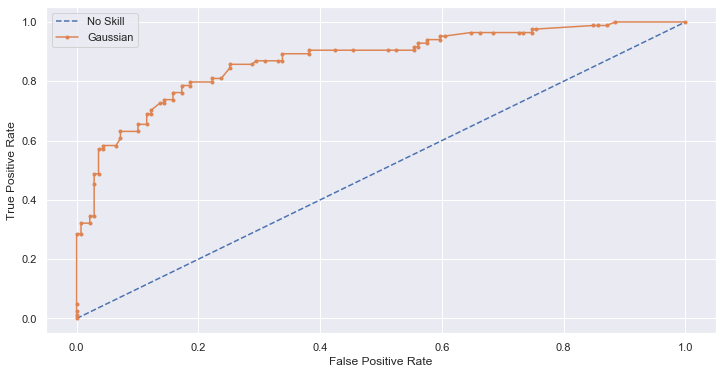

In [46]:
# predict probabilities
nb_probs = Gaussian.predict_proba(X_valid)

# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
nb_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian: ROC AUC=%.3f' % (nb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_valid, nb_probs)

# plot the roc curve for the model
plt.figure(figsize=[12, 6])
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(nb_fpr, nb_tpr, marker='.', label='Gaussian')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

## Test Data

In [47]:
test_id = data_test['PassengerId']
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Coded,Sex_Coded,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,2,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3,2,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,2,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,2,2,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,2,0,2


In [48]:
prediction_logistic = logreg.predict(data_test[['Pclass', 'Age', 'Embarked_Coded', 'Sex_Coded', 'Family']])

prediction_nb = Gaussian.predict(data_test[['Pclass', 'Age', 'Embarked_Coded', 'Sex_Coded', 'Family']])

In [49]:
submission_logistic = pd.DataFrame(test_id)
submission_logistic['Survived'] = prediction_logistic

submission_nb = pd.DataFrame(test_id)
submission_nb['Survived'] = prediction_nb

In [50]:
submission_logistic.to_csv('Submission_Logistic.csv', index = False)
submission_nb.to_csv('Submission_Nb.csv', index = False)

## Kaggle Results

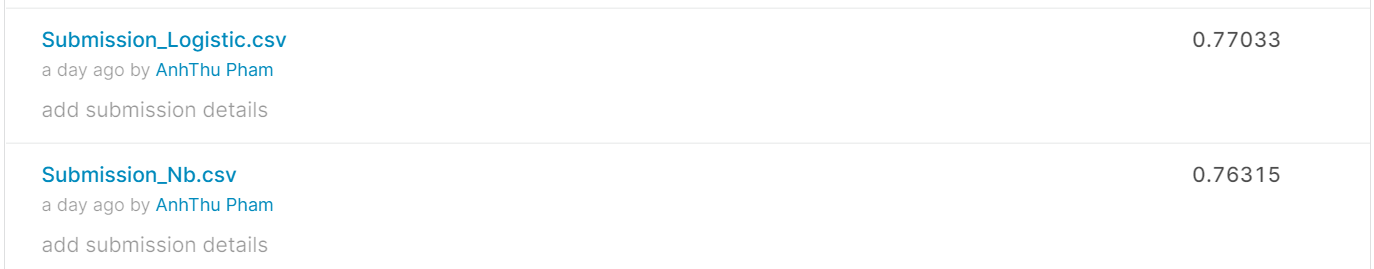

In [51]:
from PIL import Image

# Linear Regression
path = "Scores.PNG"
img  = Image.open(path) 
img

## Exposition

For this project, I have chosen Ticket Class (Pclass), Age, Port of Embarkation (Embarked_Coded), Sex, and Family variables to build classification models. Family is the combination of number of siblings/spouses (sibsp) and number of parents/children (parch). There is a little imbalance in data which can cause bias in prediction such as there were more male passengers than female passengers. Most of them were solo travelers, embarked from port Southampton, and bought 3rd class ticket. There is also a little right skew in the distribution of age.

Logistic regression is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Survived/Not Survived) in nature. The Logistic Regression model in this project returns 77% accuracy on the test set.

A Naive Bayes classifier is a probabilistic machine learning model that is used for classification task. The crux of the classifier is based on the Bayes theorem. The Naive Bayes model in this project returns 76% accuracy.